Loading Timit Training Dataset using DeepLake

In [8]:
!pip install "deeplake<4"
!pip install av
!pip install deeplake[audio]

import deeplake
Training_Data_Set = deeplake.load("hub://activeloop/timit-train")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 31.7 MB/s eta 0:00:00


-

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/timit-train



-

hub://activeloop/timit-train loaded successfully.



Citation

In [ ]:
'''
CITATION
@inproceedings,
  title = {TIMIT Acoustic-Phonetic Continuous Speech Corpus},
  author = {John S. Garofolo, Lori F. Lamel, William M. Fisher, Jonathan G. Fiscus, David S. Pallett, Nancy L. Dahlgren, Victor Zue},
  booktitle = {Linguistic Data Consortium, },
  year = {1993}
}
'''

Messing around with the dataset

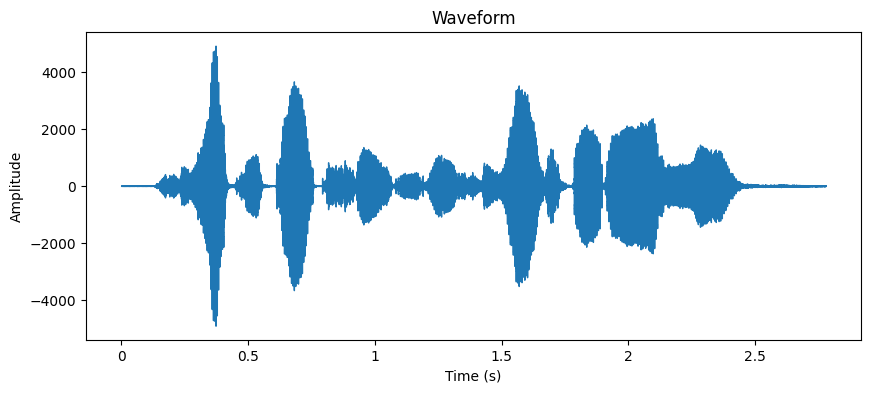

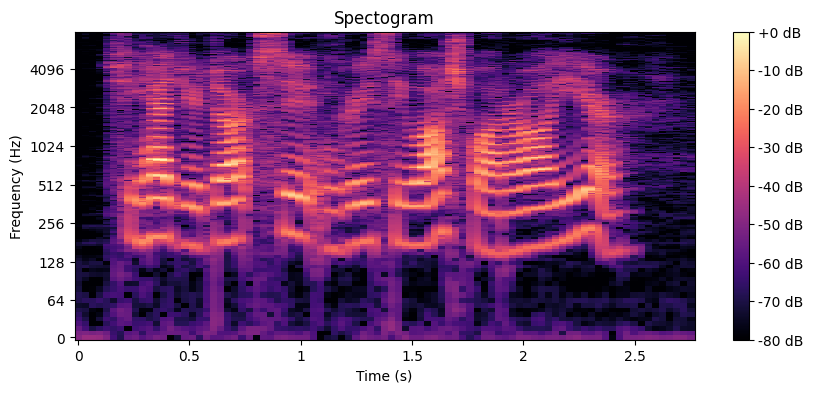

In [13]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

sample = Training_Data_Set[1]  #access the first sample


#access the audio waveform from the 'audios' tensor
def process_timit_sample(sample):

    audio = sample['audios'].numpy() #extract the audio waveform as a NumPy array
    texts = sample['texts'].numpy() #extract the corresponding text

    sr = 16000 #TIMIT dataset has a 16kHz sample rate
    if len(audio.shape) > 1:
            audio = audio.flatten()

    #plot the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    fr = librosa.stft(audio) #forier transform
    s_db = librosa.amplitude_to_db(abs(fr),ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(s_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

process_timit_sample(sample)
